In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prepare Data

In [20]:
iris = load_iris()
X = iris['data']
Y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
input_dim = len(feature_names)
output_dim = len(names)
print(output_dim, names)
print(input_dim, feature_names)
print(X.shape, Y.shape)
print(" ")
print(X[:8,:])
print(" ")
print(Y[:8])

3 ['setosa' 'versicolor' 'virginica']
4 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4) (150,)
 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]]
 
[0 0 0 0 0 0 0 0]


## Visualize Data

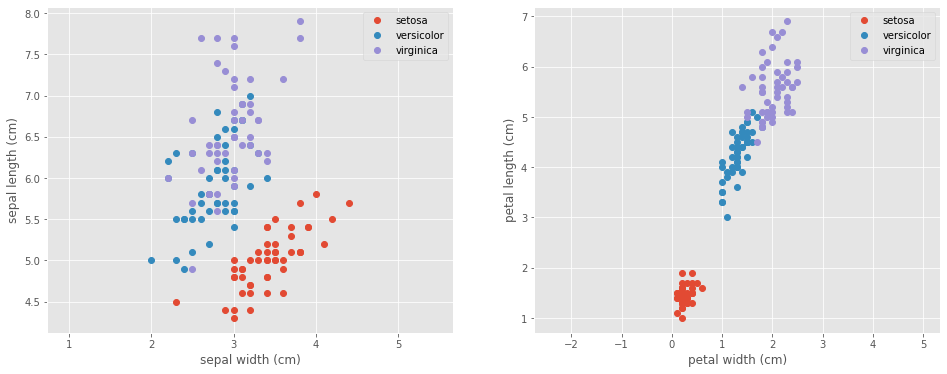

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x_axis_idx = feature_names.index('sepal width (cm)')
y_axis_idx = feature_names.index('sepal length (cm)')

for target, target_name in enumerate(names):
    X_plot = X[Y == target]
    ax1.plot(X_plot[:, x_axis_idx], X_plot[:, y_axis_idx], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[x_axis_idx])
ax1.set_ylabel(feature_names[y_axis_idx])
ax1.axis('equal')
ax1.legend();

x_axis_idx = feature_names.index('petal width (cm)')
y_axis_idx = feature_names.index('petal length (cm)')

for target, target_name in enumerate(names):
    X_plot = X[Y== target]
    ax2.plot(X_plot[:, x_axis_idx], X_plot[:, y_axis_idx], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[x_axis_idx])
ax2.set_ylabel(feature_names[y_axis_idx])
ax2.axis('equal')
ax2.legend();

## Configure Neural Network Models

a simple FeedFarward Neural Network

In [17]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [18]:
class Model(nn.Module):
    def __init__(self, input_dim, ouput_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, ouput_dim)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [21]:
model = Model(input_dim, output_dim)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)